In [8]:
import sys
from  math import log
import os
import numpy as np
from sklearn import preprocessing
from skimage.transform import resize
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('TKAgg', warn=False)
%matplotlib inline
from skimage import color

In [5]:
history = 20
forecast = 5
FACTORS = 2
width = 128
height = width
stocks = ["MMM", "GE"]
modes = ["train", "test"]

# def normalize(arr):
#     maximum = []
#     minimum = []
#     for i in range(len(arr[0])):
#         temp = [arr[j][i] for j in range(len(arr))]
#         maximum += [max(temp)]
#         minimum += [min(temp)]
#     copy = []
#     for j in range(len(arr)):
#         copy.append([(arr[j][i] - minimum[i]) / (maximum[i] - minimum[i]) for i in range(len(arr[j]))])
#     return copy

def normalize(arr):
    copy = []
    for j in range(len(arr)):
        copy.append([log(arr[j][i] / arr[0][i]) for i in range(len(arr[j]))])
    return copy

def plotting(x):
    fig = plt.figure(figsize=(width/100, height/100), dpi=100)
    fig.add_subplot(1,1,1)
    plt.plot(x, color="black", linewidth=5.0*height/100)
    plt.axis('off')
    fig.canvas.draw()

    mplimage = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8)
    mplimage = mplimage.reshape((fig.canvas.get_width_height()[::-1] + (3,)))
    gray_image = color.rgb2gray(mplimage)
    mplimage = resize(mplimage, (width, width, 1))
    plt.close(fig)
    
    return gray_image

for s in stocks:
    for m in modes:
        directory = os.path.abspath('../Data/'+ s + '/' + s + '_' + m)
        dataFile = open(s + '_' + m + ".txt")
        dates = []
        
        print("Extracting " + str(dataFile.name))
        
        for line in dataFile:
            doubles = line.split()
            if len(doubles) == FACTORS:
                dates.append([float(doubles[i])
                              for i in range(len(doubles)-1)])
        
        length = len(dates) - history - forecast
        
        for i in range(length):
            temp = normalize(dates[i:i+history+forecast])
            x = plotting(np.array(temp[:history]).flatten())
            y = plotting(np.array(temp[history:]).flatten())
            np.save(directory + "/" + s + "_" + m + str(i) + ".pst", x)
            np.save(directory + "/" + s + "_" + m + str(i) + ".ftr", y)
        print("Done Extracting " + str(dataFile.name))


Extracting MMM_train.txt


C:\Users\lukes\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
C:\Users\lukes\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


KeyboardInterrupt: 

<Figure size 128x128 with 0 Axes>

In [27]:
import stockdatautils as datautils
stocks = ['MMM', 'GE']
evalstocks = ['MMM', 'GE']
data = []
for s in stocks:
    trainDir = "../Data/" + s + "/" + s + "_train/"
    dataset = np.array(datautils.load_data_numpy(trainDir, '.pst.npy'))
    print(dataset.shape)
    data += [dataset]
    
traindata = np.concatenate(data)

(2489, 128, 128, 1)
(2489, 128, 128, 1)


(4978, 128, 128, 1)
(128, 128)


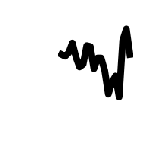

In [28]:
width = 128
height = width
print(traindata.shape)
fig = plt.figure(figsize=(width/100,height/100), dpi=100)
fig.add_subplot(1,1,1)
test = np.array(traindata[0,:,:,:])
test = np.reshape(test, newshape=(width,height))
print(test.shape)
plt.imshow(test, cmap="gray")
plt.axis('off')
fig.canvas.draw()